# <strong> Atividade 1 - Mineração de Dados </strong>


<h5> 
Nome: Davi Augusto Neves Leite <br/>
Data de Entrega: 19/09/2023
</h5>


---


### <strong> Materiais </strong>


Os principais recursos para a execução desta atividade podem ser vistos a seguir.

1. <strong>Software</strong>

- Sistemas Operacionais: Windows 11 para _desktop_;
- Ambiente de Desenvolvimento Integrado: Microsoft Visual Studio Code;
- Linguagem de Programação: Python 3.11.5 64-bit.

2. <strong>Hardware</strong>

- Notebook pessoal Lenovo Ideapad 330-15IKB com: processador Intel Core i7-8550U, HDD WD Blue WD10SPZX de 1TB, SSD Crucial BX500 de 240GB, 12 GB DDR4 de Memória RAM e placa de vídeo NVIDIA GeForce MX150 (2 GB GDDR5 de memória).


---


### <strong> Importação das Bibliotecas Principais </strong>

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a importação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [48]:
import numpy as np      # Manipulação de listas
import pandas as pd     # Manipulação de tabelas
import seaborn as sbn   # Geração de gráficos estatísticos
import matplotlib.pyplot as plt  # Geração de gráficos de listas
import sklearn as skl   # Biblioteca para pré-processamento


---


### Conjunto Numérico: <em><strong>Rice (Cammeo and Osmancik)</em></strong>


<strong>Descrição do Dataset:</strong>
este conjunto é composto por 3810 dados obtidos acerca de duas espécies diferentes de grãos de arroz na Turquia. Os dados estão compostos por 7 características morfológicas (atributos) destes grãos: área, perímetro,comprimento do eixo principal, comprimento do eixo menor,excentricidade, área convexa e extensão. A descrição de cada atributo pode ser vista a seguir.

1. **Área (decimal):** número de pixels dentro dos limites do grão de arroz;
2. **Perímetro (decimal):** circunferência do grão de arroz por meio do cálculo da distância de pixels ao redor dos limites do grão de arroz;
3. **Comprimento do Eixo Principal (decimal):** linha mais longa que pode ser desenhada no grão de arroz;
4. **Comprimento do Eixo Menor (decimal):** linha mais curta que pode ser desenhada no grão de arroz;
5. **Excentricidade (decimal):** medida que diz respeito ao quão redonda é a elipse do grão de arroz;
6. **Área convexa (inteiro):** contagem de pixels da menor concha convexa da região formada pelo grão de arroz;
7. **Extensão (decimal):** proporção da região formada pelo grão de arroz em relação aos pixels da caixa delimitadora.

Especificamente, as espécies estudadas foram a _Osmancik_ e a _Cammeo_, ambas com características semelhantes de uma aparência larga, longa e sem brilho.

Este conjunto de dados pode ser acessado por meio de: https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik
(última data de acesso: 15 de set. de 2023).


#### <strong> Informações Básicas </strong>


In [49]:
# Acesso dos dados do dataset "Rice"
from scipy.io.arff import loadarff  # Carregar arquivo tipo .arff

dataset_rice_arff = loadarff('./Datasets/01_Rice_Cammeo_Osmancik.arff')
data = pd.DataFrame(data=dataset_rice_arff[0])

# Mostra os 5 primeiros e últimos registros
print(data)


         Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.825692   

      Convex_Area    Extent

In [50]:
# Mostra os 5 primeiros registros, formatados
data.head()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


In [51]:
# Mostra os 5 últimos registros, formatados
data.tail()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'
3809,11434.0,404.709991,161.079269,90.868195,0.825692,11591.0,0.802949,b'Osmancik'


In [52]:
# Mostra a quantidade de linhas e colunas da tabela (tupla)
data.shape


(3810, 8)

In [53]:
# Mostra as informações dos atributos e outras do dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


#### <strong> Exploração dos Dados </strong>


##### Dados Simples: Média, Desvio-Padrão, Mínimo, Mediana, Máximo


In [54]:
import pandas.api.types as pd_types  # Identificar o tipo de dado do dataset

# Percorrer cada atributo (coluna) e mostrar os dados estatísticos básicos de cada um
for col in data.columns:
    if pd_types.is_numeric_dtype(data[col]):
        print(f'{col}')
        print('\t Média = {:.2f}'.format(data[col].mean()))
        print('\t Desvio-Padrão = {:.2f}'.format(data[col].std()))
        print('\t Mínimo = {:.2f}'.format(data[col].min()))
        print('\t Mediana = {:.2f}'.format(data[col].median()))
        print('\t Máximo = {:.2f}'.format(data[col].max()))


Area
	 Média = 12667.73
	 Desvio-Padrão = 1732.37
	 Mínimo = 7551.00
	 Mediana = 12421.50
	 Máximo = 18913.00
Perimeter
	 Média = 454.24
	 Desvio-Padrão = 35.60
	 Mínimo = 359.10
	 Mediana = 448.85
	 Máximo = 548.45
Major_Axis_Length
	 Média = 188.78
	 Desvio-Padrão = 17.45
	 Mínimo = 145.26
	 Mediana = 185.81
	 Máximo = 239.01
Minor_Axis_Length
	 Média = 86.31
	 Desvio-Padrão = 5.73
	 Mínimo = 59.53
	 Mediana = 86.43
	 Máximo = 107.54
Eccentricity
	 Média = 0.89
	 Desvio-Padrão = 0.02
	 Mínimo = 0.78
	 Mediana = 0.89
	 Máximo = 0.95
Convex_Area
	 Média = 12952.50
	 Desvio-Padrão = 1776.97
	 Mínimo = 7723.00
	 Mediana = 12706.50
	 Máximo = 19099.00
Extent
	 Média = 0.66
	 Desvio-Padrão = 0.08
	 Mínimo = 0.50
	 Mediana = 0.65
	 Máximo = 0.86


##### Quantidade de Dados de Cada Classe


In [55]:
# Retornar a quantidade de classes do dataset por meio da coluna "Class"
# Nota: o nome da coluna deve ser exatamente igual ao do dataset (case-sensitive)
data['Class'].value_counts()


Class
b'Osmancik'    2180
b'Cammeo'      1630
Name: count, dtype: int64

##### Dados Estatísticos Completos Para Cada Atributo


Neste primeiro caso, são incluídos tanto os dados estatísticos básicos, como média e desvio padrão, quanto alguns dos mais avançados, como os percentis (25%, 50% e 75%). Vale ressaltar que neste caso há a análise para cada atributo separadamente, ou seja, dados como covariância, a qual relaciona os atributos entre si, não são mostrados.


In [56]:
# Retornar, para cada atributo (coluna), a descrição estatística completa
# Incluem: média, frequência, mínimo, percentis (25, 50 e 75), dentre outros
data.describe(include='all')


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'Osmancik'
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2180
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,NaN
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,NaN
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,NaN
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862,NaN
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,NaN
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,NaN


É possível inferir, por exemplo, que a classe "Osmancik" é a mais recorrente com a existência de 2180 registros do total de 3810 deste _dataset_.


No caso abaixo, há a medida de correlação de cada par de atributos por meio do cálculo da chamada variância. A variança mede o quanto os dados estão dispersos em torno da média e, para isso, utiliza-se diretamente do desvio-padrão. Em termos práticos: quanto menor é a variância, mais próximos os valores estão da média.


In [57]:
print('Covariância:')

# Mostrando os dados na forma de tabela
data.cov(numeric_only=True)


Covariância:


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,3.001098e+06,59598.487027,27295.901605,7820.219745,12.697890,3.075103e+06,-8.186820
Perimeter,5.959849e+04,1267.152207,603.658849,128.462718,0.403575,6.135336e+04,-0.359969
Major_Axis_Length,2.729590e+04,603.658849,304.456381,45.199146,0.258226,2.801005e+04,-0.188090
Minor_Axis_Length,7.820220e+03,128.462718,45.199146,32.830807,-0.034792,8.016253e+03,0.028044
Eccentricity,1.269789e+01,0.403575,0.258226,-0.034792,0.000433,1.304780e+01,-0.000319
Convex_Area,3.075103e+06,61353.358157,28010.051333,8016.253386,13.047800,3.157630e+06,-9.034724
Extent,-8.186820e+00,-0.359969,-0.188090,0.028044,-0.000319,-9.034724e+00,0.005966


<Axes: >

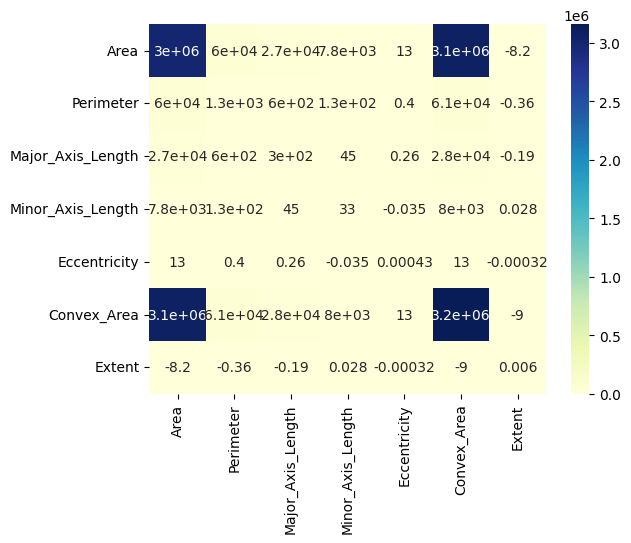

In [58]:
# Mostrando na forma de mapa de calor
sbn.heatmap(data.cov(numeric_only=True), annot=True, cmap='YlGnBu')


Também, é possível visualizar a seguir os _boxplots_ de cada atributo, os quais mostram a distribuição de valores a partir dos limitantes inferior e superior e com uma "caixa" que indica a concentração de valores.


<Axes: >

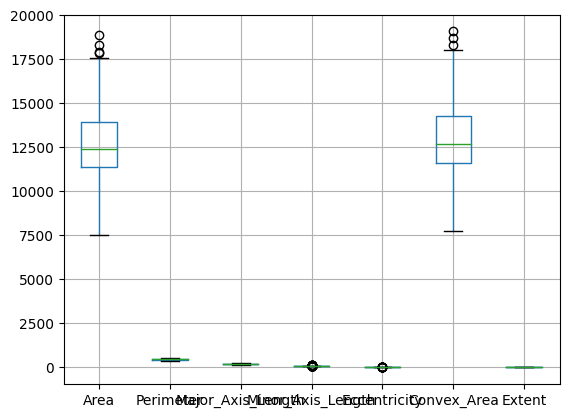

In [59]:
# Plotando todos os boxplots num mesmo gráfico
data.boxplot()


Tomando como exemplo o atributo _Area_, é possível visualizar no gráfico acima que a maior concentração de dados está na faixa de valores do intervalo de _10000 e 15000_, com o mínimo sendo em _7500_ e o máximo sendo próximo de _20000_, sendo este máximo considerado um ruído (ou _outlier_, a ser visto na próxima seção).
Contudo, especialmente ao comparar os atributos de _Area_ e _Convex_Area_ com os demais nota-se que os dados plotados estão em escalas bem diferentes e, portanto, isso indica que deve ser realizado uma normalização deste conjunto para que seja possível analisar e, posteriormente, processar os dados de forma mais otimizada. A normalização será tratada na seção de **Pré-Processamento dos Dados**.


Por fim, outro tipo de gráfico bastante usado para análise é o de _scatter_. Abaixo, é possível visualizar os dados de cada classe como pontos na tupla de atributos relacionados _Area, Convex_Area_.


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

<Axes: xlabel='Area', ylabel='Convex_Area'>

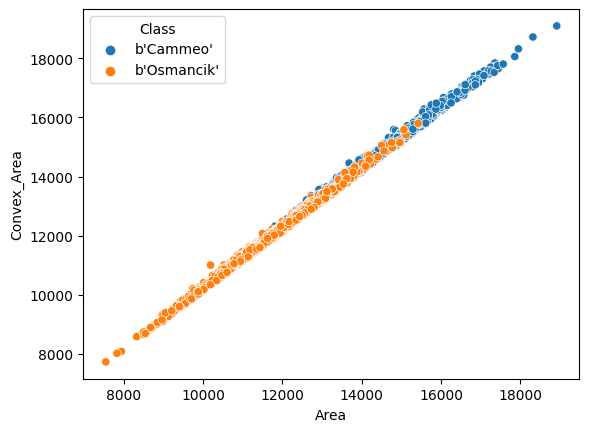

In [60]:
sbn.scatterplot(data=data, x='Area', y='Convex_Area', hue='Class')


É possível inferir, por exemplo, que uma grande parte de dados da classe _Osmancik_ possui áreas que a classe _Cammeo_ não possui, nos intervalos de valores entre _0 à 10000_. Também, é possível visualizar que muitos dados das duas classes estão sobrepostos uns com os outros.


#### <strong> Pré-Processamento dos Dados </strong>


O pré-processamento consiste na aplicação de diversas técnicas para limpar, selecionar e transformar os dados para melhorar a análise dos mesmos. Algumas técnicas: Agregação, _Sampling_, **_Feature Selection_**, **Redução da Dimensionalidade**, **_Feature Creation_**, Discretização/Binarização, dentre outras.


##### Tratamento de Dados Perdidos


##### Tratamento de _Outliers_


Os _Outliers_ simbolizam dados com características que são consideravelmente diferentes da maioria dos outros dados em um _dataset_. Em outras palavras, simbolizam ruídos que atrapalham ou ajudam na análise dos dados, dependendo do objetivo.

Para identificá-los, é possível por duas abordagens: com base na possibilidade de obter exemplos rotulados pelo usuário, como pelos métodos supervisionados; ou com base em suposições sobre dados normais, como pelo **DBSCAN**. Uma maneira comum consiste em encontrar os percentis e calcular o gráfico de _boxplot_, sendo que os _outliers_ devem seguir as seguintes condições, com base nos limitantes inferior (LB) e superior (UB) do gráfico:

- **Oulier < LB:** Outlier = (Q1 - 1.5 \* IQR), em que Q1 é o percentil de 25%
- **Outlier > UB:** Outlier = (Q3 + 1.5 \* IQR), em que Q3 é o percentil de 75%


---


### Conjunto Categórico: <em><strong>Congressional Voting Records</em></strong>


<p>
<strong>Descrição do Dataset:</strong>
descrição
</p>

Este conjunto de dados pode ser acessado por meio de: https://archive.ics.uci.edu/dataset/105/congressional+voting+records (última data de acesso: 15 de set. de 2023).


---


### Conjunto Misto (Numérico e Categórico): <em><strong>Breast Cancer</em></strong>


<p>
<strong>Descrição do Dataset:</strong>
descrição
</p>

Este conjunto de dados pode ser acessado por meio de: https://archive.ics.uci.edu/dataset/14/breast+cancer (última data de acesso: 15 de set. de 2023).
